Very large data set: 1.6 GB csv file

it was scraped from the Lending Club website

comes from here

 https://www.kaggle.com/datasets/wordsforthewise/lending-club?select=accepted_2007_to_2018Q4.csv.gz

 we are only using the dataset with accepted loans

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 150

In [10]:
path= "C:\\Users\\giuse\\OneDrive\\Desktop\\uni venezia\\terzo periodo\\models and technologies for the financial industry\\lending_club_large\\accepted_2007_to_2018q4.csv\\accepted_2007_to_2018Q4.csv"
df = pd.read_csv(path, low_memory = False)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB
None


In [11]:


#selecting the variables of our interest
cols_to_keep = [
    "annual_inc","application_type","dti","earliest_cr_line","emp_length","fico_range_high","fico_range_low","grade",
    "home_ownership","inq_last_6mths","installment","int_rate","issue_d","loan_amnt","loan_status","mo_sin_rcnt_tl",
    "mort_acc","mths_since_recent_bc","disbursement_method","verification_status","term","tax_liens","sub_grade",
    "purpose","pub_rec_bankruptcies","percent_bc_gt_75","num_bc_tl","num_actv_rev_tl","num_actv_bc_tl","num_accts_ever_120_pd",
    "acc_now_delinq","acc_open_past_24mths","hardship_flag","open_acc","pct_tl_nvr_dlq","pub_rec","total_acc","total_bal_ex_mort"
]

df = df[cols_to_keep]
df.dropna(inplace = True)
df.reset_index(inplace = True, drop = True)



Most of the columns we removed had NAs on a large portion of the dataset.
Also some columns already contained information on the loan default

The features we kept have information on the borrower's income, employment, previous credit history, on the loan interest, purpose, duration.

The loan_status variable is the target feature of our analysis

In [12]:
df.loan_status.value_counts()

loan_status
Fully Paid            953502
Current               803484
Charged Off           234903
Late (31-120 days)     19341
In Grace Period         7745
Late (16-30 days)       3853
Default                   33
Name: count, dtype: int64

We need to group it into two classes: default = 1 and default = 0

Also we will drop current loans, since at the time the data was scraped from Lending Club website it wasn't known if the loan defaulted or not.

In [13]:
df = df[df.loan_status != "Current"] #dropping current loans

default_categories = ['Default', 'Charged Off', 'Does not meet the credit policy. Status:Charged Off']
loan_status_dummy = df.loan_status.isin(default_categories)
loan_status_dummy = loan_status_dummy.astype("uint8")
df.loan_status = loan_status_dummy

## Data visualisation


We will start with numeric, continuous variables

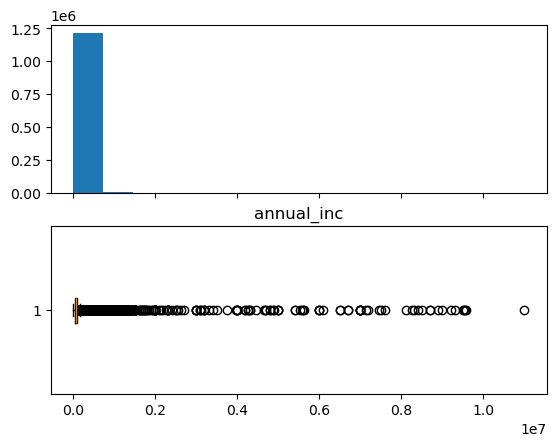

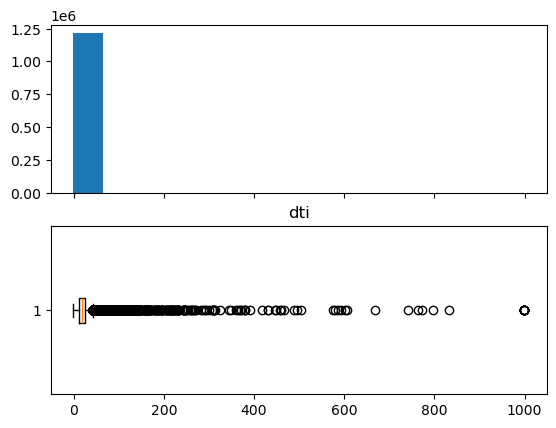

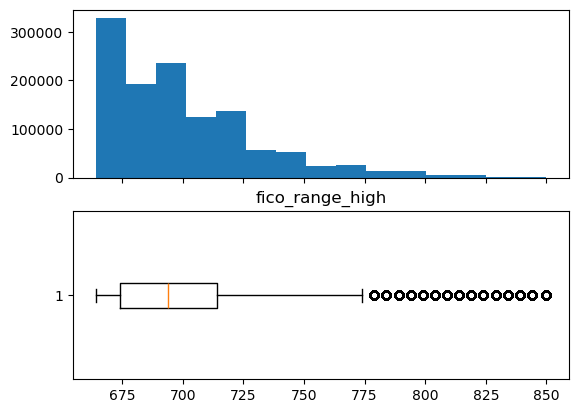

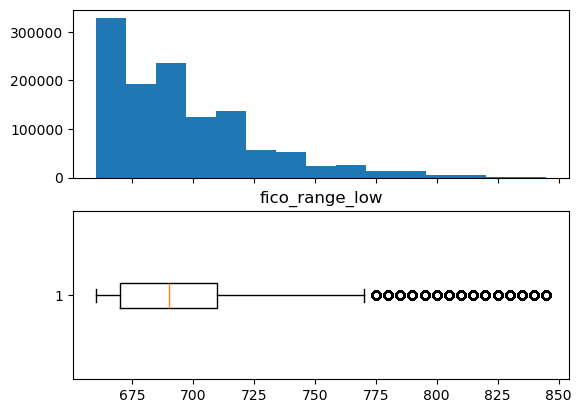

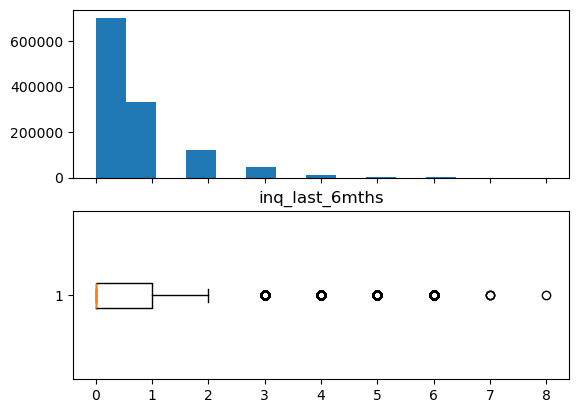

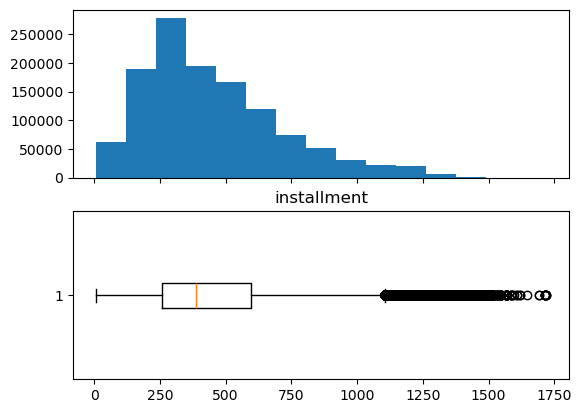

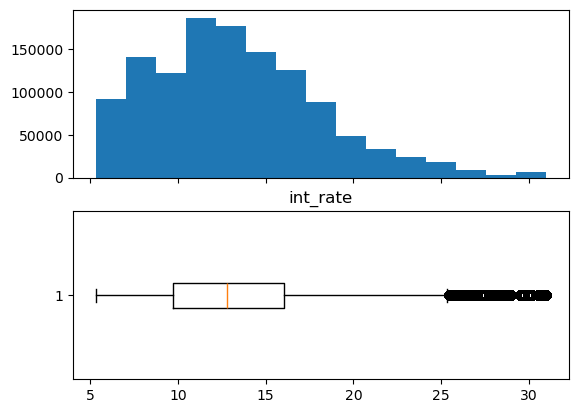

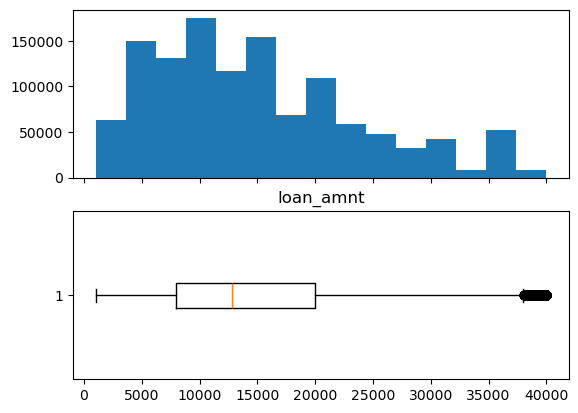

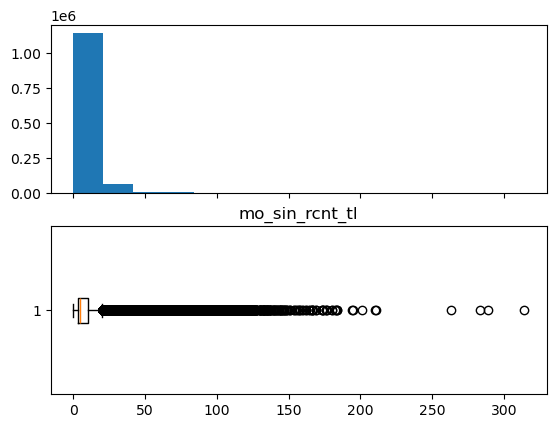

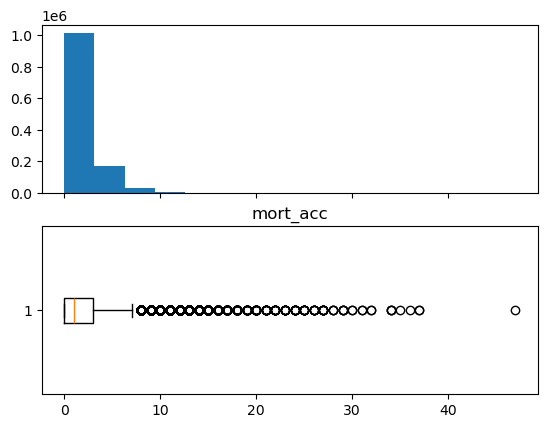

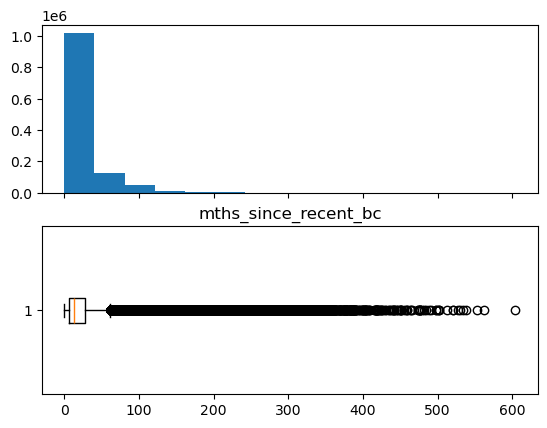

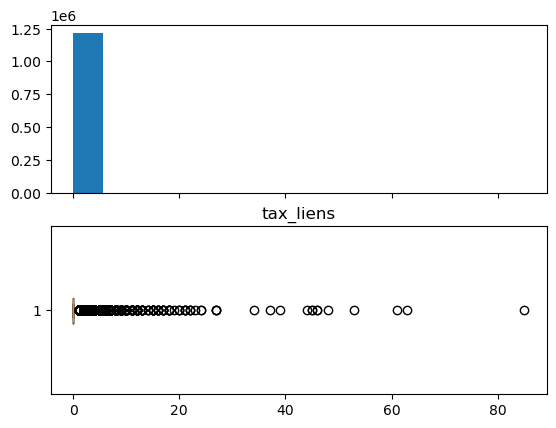

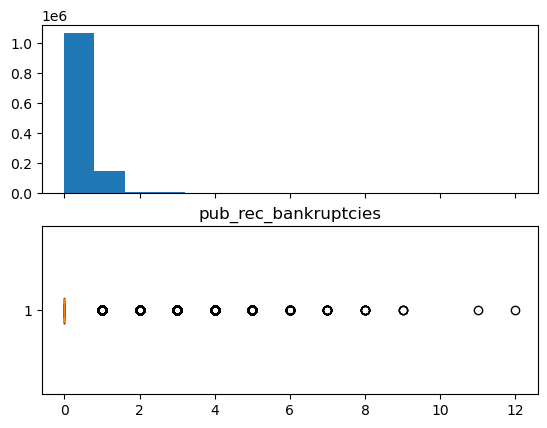

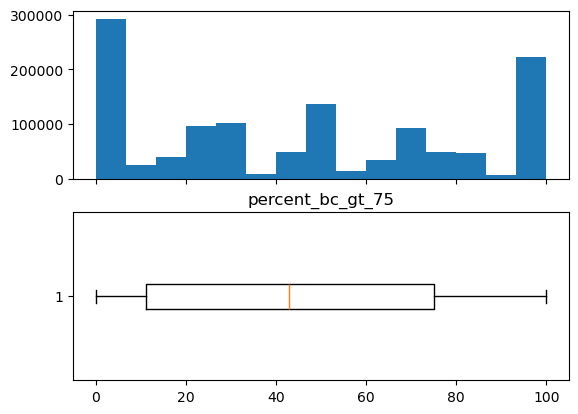

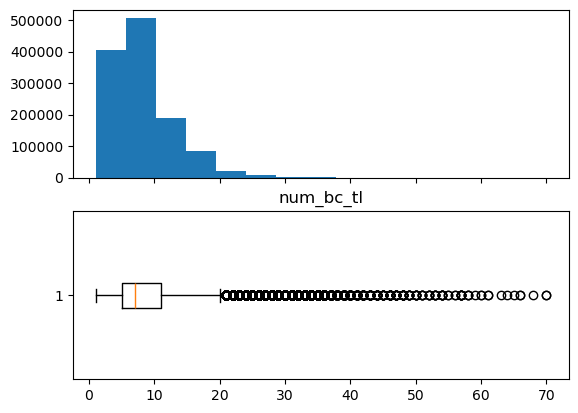

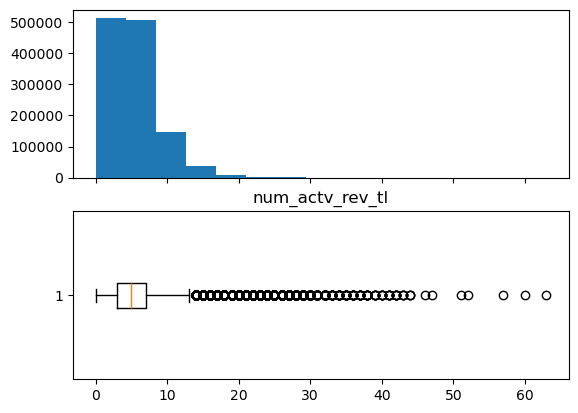

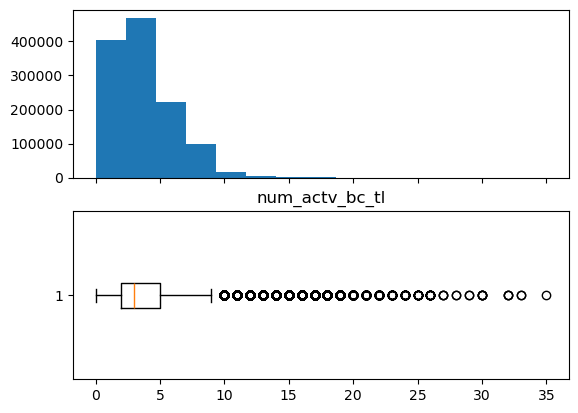

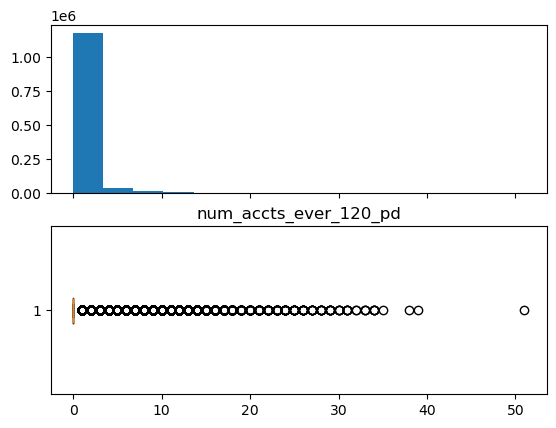

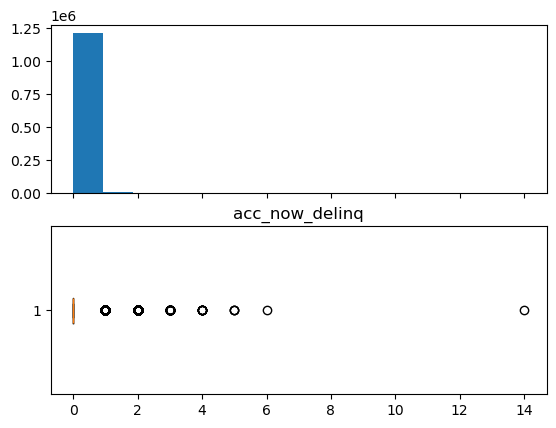

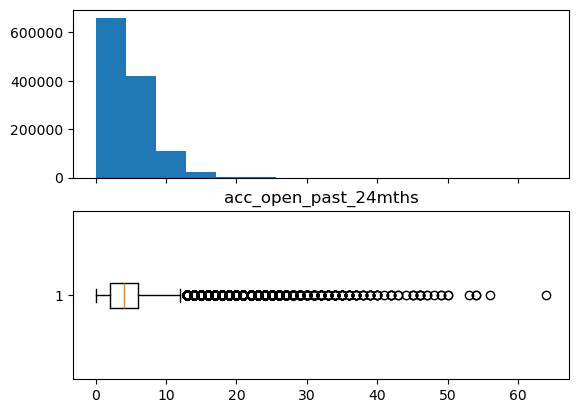

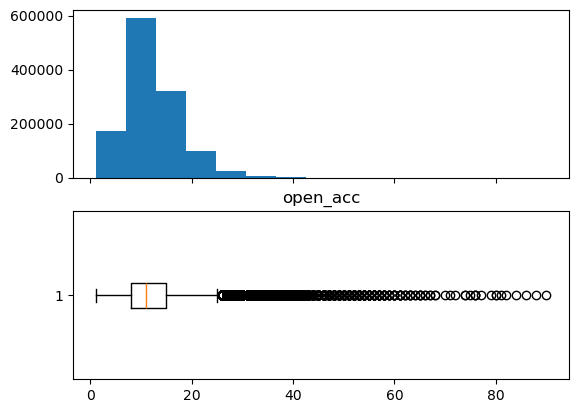

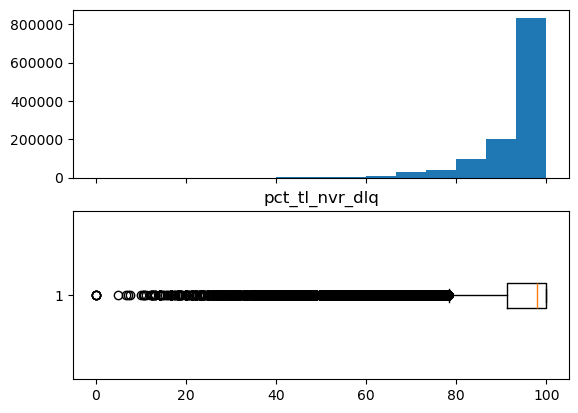

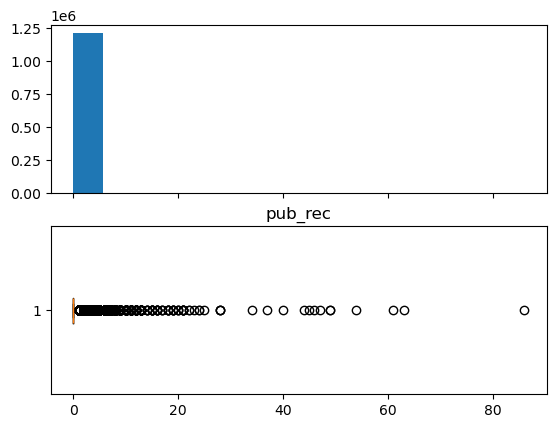

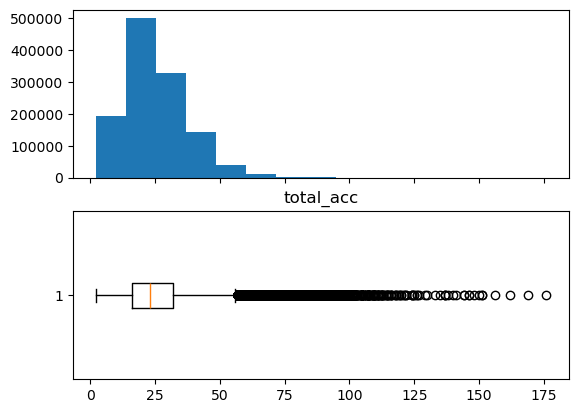

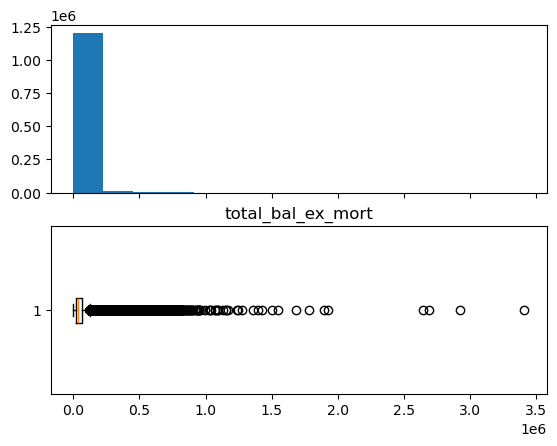

In [27]:
numeric_vars = df.columns[df.dtypes == "float64"]

for var in numeric_vars:
    fig, (ax1, ax2) = plt.subplots(2,1,sharex=True)
    ax1.hist(df[var], bins = 15)
    ax2.boxplot(df[var], vert = False)
    plt.title(var)
    plt.show()

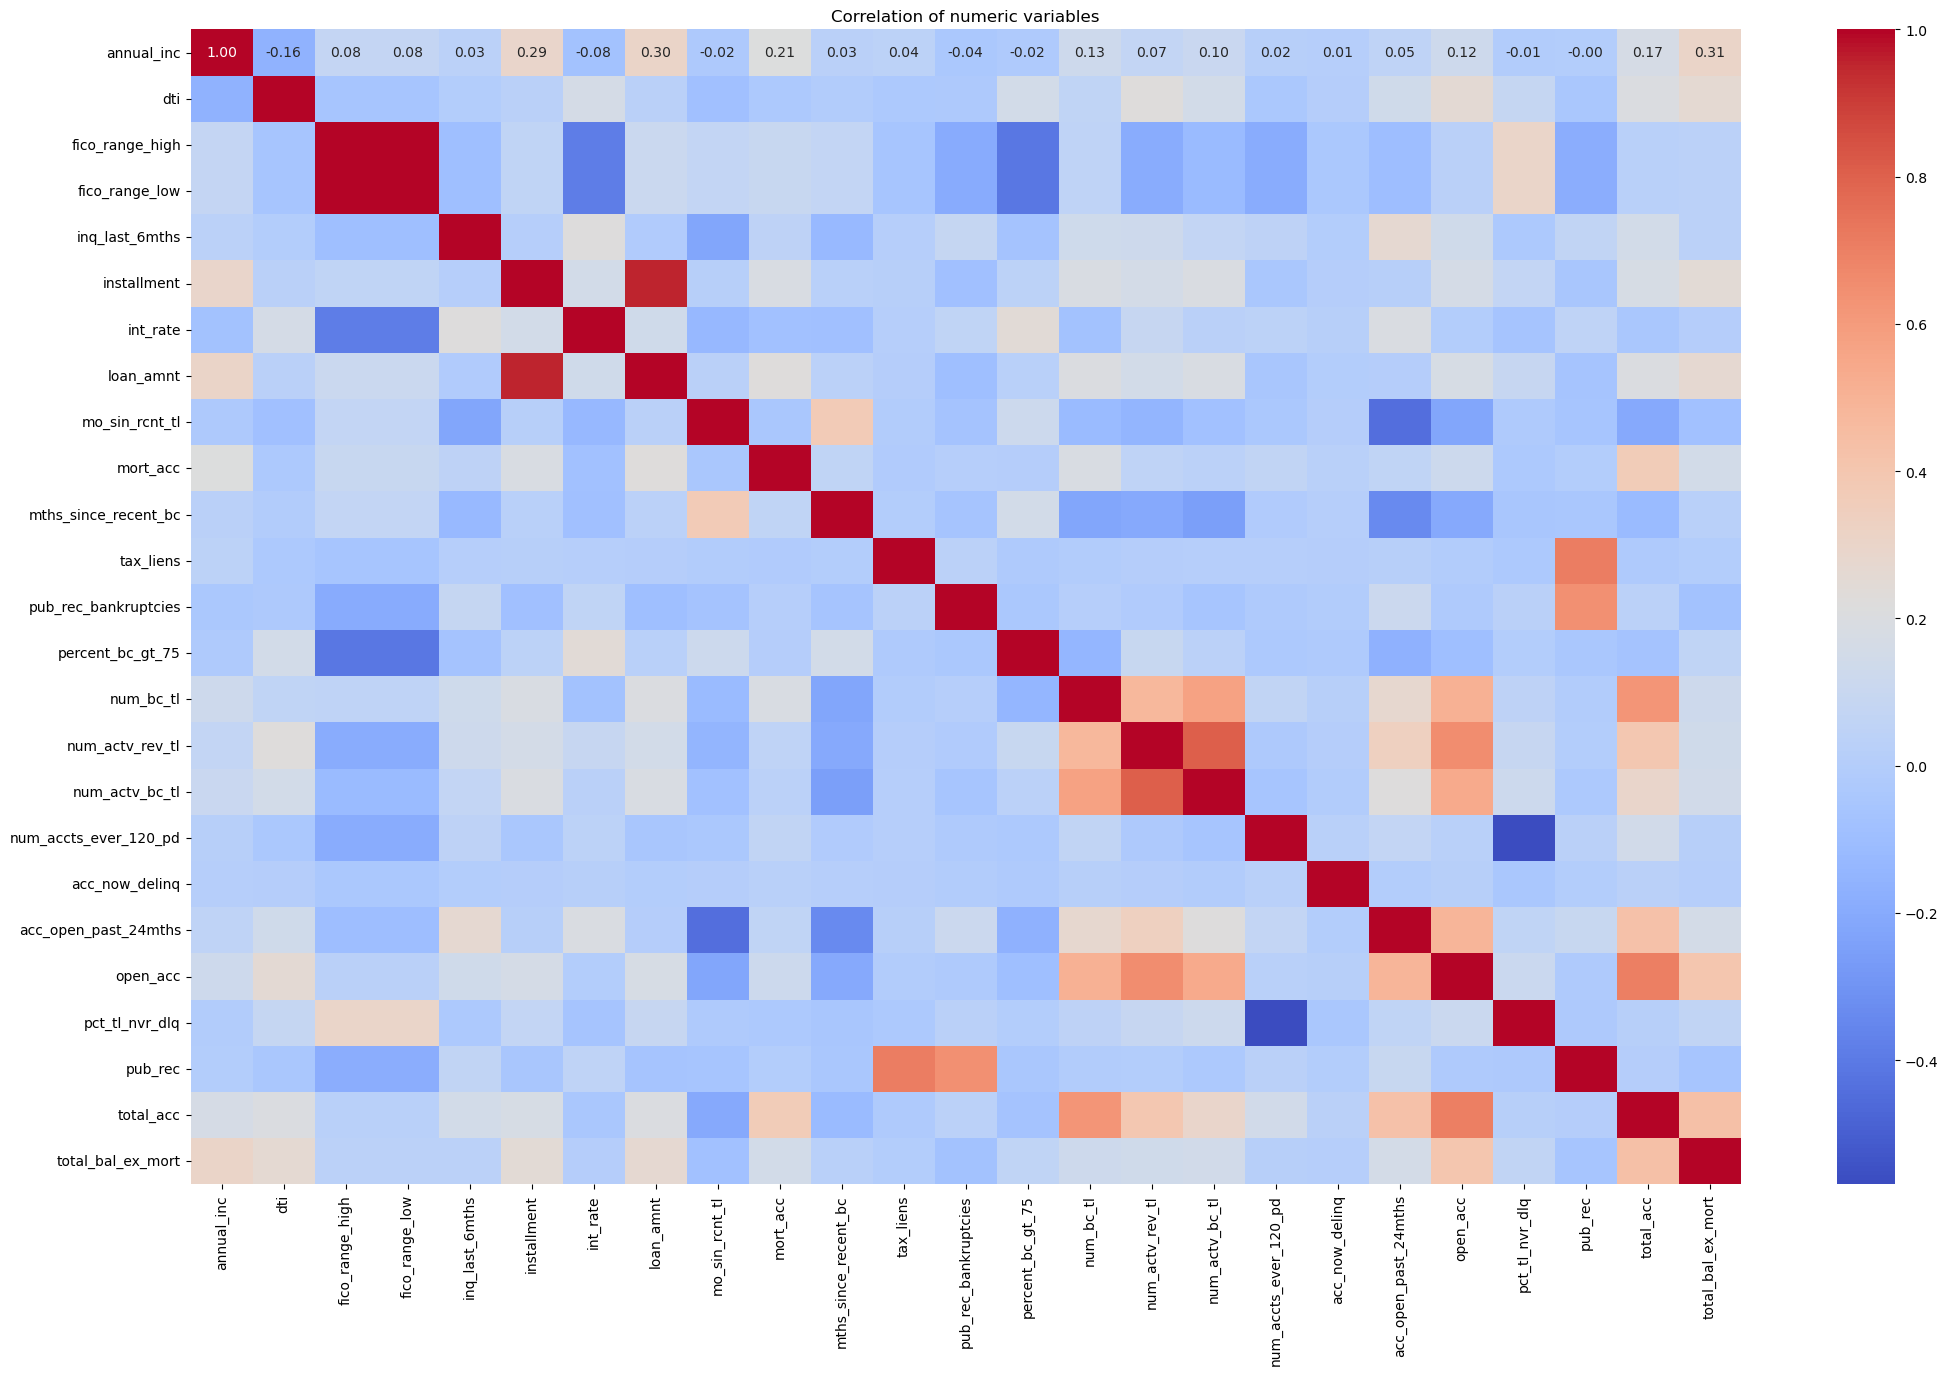

In [24]:
correlation_matrix = df[numeric_vars].corr()
plt.figure(figsize=(25,15))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation of numeric variables")
plt.show()